In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def encoding_labels(index):
    if index == 'coriander':
      return 0
    else :
       return 1

In [4]:
#load data
import numpy
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
import numpy
import os
import cv2
import numpy as np

image_path = "/content/drive/MyDrive/deep learning /2 plants"
labels=[]

def loadImages(path):

    for file in os.listdir(path):
        labels.append(file)
    image_files = [sorted([os.path.join(path , i , file)
                          for file in os.listdir(path+'/'+i)
                          if file.endswith('.jpg') or file.endswith('.JPG')])for i in labels]
    return image_files

def label_image(index):

    label = labels[index]

    return label

def load_data():
    images_files = loadImages(image_path)
    image = []
    lables = []
    for i in images_files:
        for j in i:
            label = label_image(images_files.index(i))
            output=encoding_labels(label)
            #print(output)
            lables.append(output)
            img = cv2.imread(j)
            img = cv2.resize(img, (224, 224))
            img=img_to_array(img)
            image.append(img)

    return image,lables



In [5]:
from sklearn.model_selection import train_test_split

allPictures =[]
all_labels=[]
allPictures,all_labels=load_data()
x_train,x_test,y_train,y_test=train_test_split(allPictures,all_labels,test_size=0.2,shuffle=True,stratify=all_labels)

In [6]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
print(y_train.shape, y_test.shape)
print(x_train.shape, x_test.shape)

(1283,) (321,)
(1283, 224, 224, 3) (321, 224, 224, 3)


In [7]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(1283, 2)
(321, 2)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import  SGD
from tensorflow.keras.callbacks import  EarlyStopping
from tensorflow.keras.applications.resnet50 import  ResNet50
from tensorflow.keras.optimizers import Adam


# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=(224,224,3),  weights='imagenet', include_top=False)


for layer in resnet.layers:
  layer.trainable = False

# our layers - you can add more if you want
#built_model = Sequential()
#built_model.add(resnet)
#built_model.add(GlobalAveragePooling2D())
#built_model.add(Dense(512, activation='sigmoid'))

#built_model.add(Dense(1024, activation='sigmoid'))

#built_model.add(Dense(2, activation='sigmoid'))

# view the structure of the model
#built_model.summary()
# Build the model
built_model = Sequential()
built_model.add(resnet)
built_model.add(GlobalAveragePooling2D())
built_model.add(Dense(512, activation='sigmoid'))
#built_model.add(Dropout(0.5))
built_model.add(Dense(1024, activation='sigmoid'))
built_model.add(Dropout(0.5))
built_model.add(Dense(2, activation='sigmoid'))

# Summary of the model
built_model.summary()

# tell the model what cost and optimization method to use
built_model.compile(
  loss='binary_crossentropy',
  #optimizer=SGD(lr=0.001, momentum=0.9),
  optimizer=Adam(lr=0.001),
  metrics=['accuracy']
)

trained_model_5d = built_model.fit(x_train, y_train_one_hot , shuffle =True,
                             epochs=10,
                             batch_size=210,
                             validation_data=(x_test, y_test_one_hot),
                             callbacks = [EarlyStopping(monitor='loss',mode='min', verbose=1, patience=10)])

94765736/94765736 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 20

Epoch 1/10
7/7 [==============================] - 349s 50s/step - loss: 0.4626 - accuracy: 0.8012 - val_loss: 0.1395 - val_accuracy: 0.9470
Epoch 2/10
7/7 [==============================] - 330s 48s/step - loss: 0.1365 - accuracy: 0.9478 - val_loss: 0.1657 - val_accuracy: 0.9439
Epoch 3/10
7/7 [==============================] - 344s 51s/step - loss: 0.1146 - accuracy: 0.9540 - val_loss: 0.1171 - val_accuracy: 0.9439
Epoch 4/10
7/7 [==============================] - 319s 45s/step - loss: 0.0850 - accuracy: 0.9641 - val_loss: 0.1120 - val_accuracy: 0.9502
Epoch 5/10
7/7 [==============================] - 330s 48s/step - loss: 0.0793 - accuracy: 0.9657 - val_loss: 0.1081 - val_accuracy: 0.9626
Epoch 6/10
7/7 [==============================] - 309s 45s/step - loss: 0.0721 - accuracy: 0.9696 - val_loss: 0.0966 - val_accuracy: 0.9626
Epoch 7/10
7/7 [==============================] - 320s 45s/step - loss: 0.0588 - accuracy: 0.9719 - val_loss: 0.0852 - val_accuracy: 0.9688
Epoch 8/10
7/7 [====

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Evaluate the model on test data
y_pred = built_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

11/11 [==============================] - 58s 5s/step


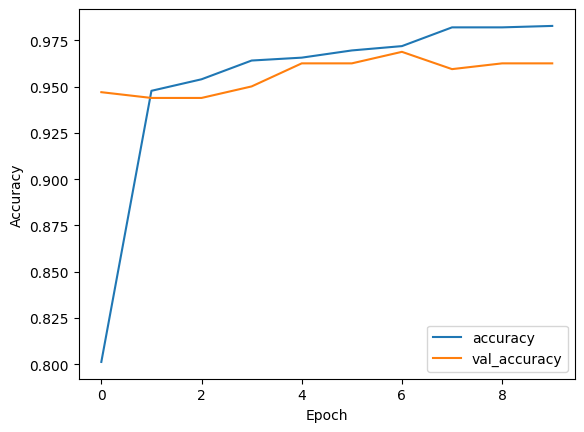

In [10]:
# Plot training history
plt.plot(trained_model_5d.history['accuracy'], label='accuracy')
plt.plot(trained_model_5d.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()



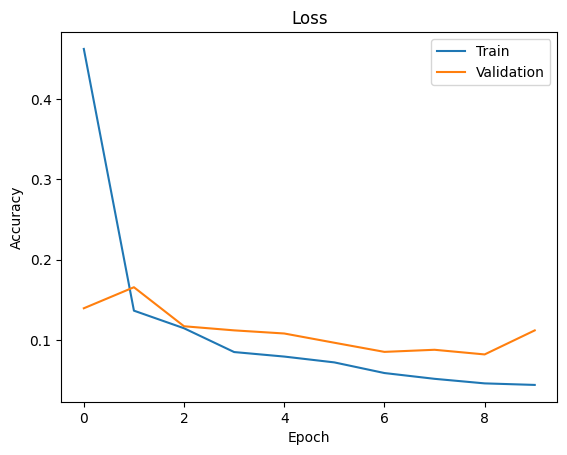

In [11]:
loss_train_curve = trained_model_5d.history["loss"]
loss_val_curve = trained_model_5d.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

In [12]:
# Calculate training and test accuracies
train_accuracy = trained_model_5d.history['accuracy'][-1]
test_loss, test_accuracy = built_model.evaluate(x_test, y_test_one_hot, verbose=0)

print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Training Accuracy: 98.29%
Test Accuracy: 96.26%


              precision    recall  f1-score   support

           0       0.99      0.94      0.96       160
           1       0.94      0.99      0.96       161

    accuracy                           0.96       321
   macro avg       0.96      0.96      0.96       321
weighted avg       0.96      0.96      0.96       321



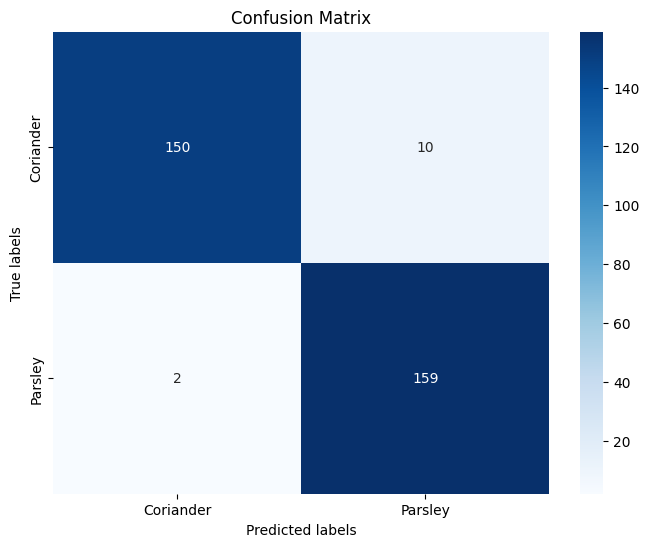

In [13]:
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Coriander', 'Parsley'], yticklabels=['Coriander', 'Parsley'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

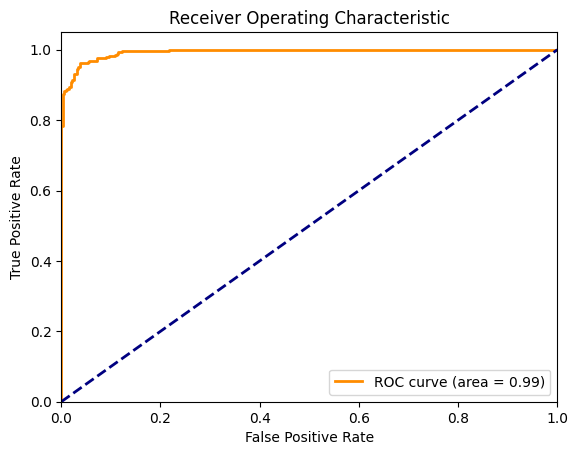

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_one_hot.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
# Function to preprocess a single image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

# Path to the new image
new_image_path = "/content/drive/MyDrive/deep learning /2 plants/parsley/frame1136.jpg"

# Preprocess the new image
new_image = preprocess_image(new_image_path)

# Predict probabilities for each class
probabilities = built_model.predict(new_image)

# Get the predicted class
predicted_class = np.argmax(probabilities)

# Decode the predicted class
class_names = ['coriander', 'Parsley']
predicted_label = class_names[predicted_class]

print("Predicted class:", predicted_label)



1/1 [==============================] - 0s 299ms/step
Predicted class: Parsley
